# MNIST Classification with Soft Margin Support Vector Machines
## MNIST files available [here](http://yann.lecun.com/exdb/mnist/)

In [86]:
%matplotlib inline
import numpy as np
import pandas as pd
import gzip, os
import matplotlib
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from urllib.request import urlretrieve

## Load MNIST handwritten digit

In [33]:
#Function that downloads MNIST data files
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    urlretrieve(source + filename, filename)

#Downloads files if they are not in active directory then unzips and loads MNIST data files
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [34]:
#Load training data
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

#Load testing data
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [35]:
#Check to see distribution of training set and test set and make sure data loaded
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution: \n" + str(dict(zip(train_digits,train_counts))))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Testing set distribution: \n" + str(dict(zip(test_digits,test_counts))))

Training set distribution: 
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Testing set distribution: 
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [36]:
#Define a function to display handwritten images
def display(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')

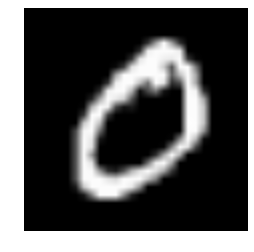

In [37]:
display(train_data[1])

##  Dual Form Multiclass Linear SVM

### General Expectations
* Expect to have linear dual form have higher error rate than RBF because of high-dimensionality of data

//TODO
* K-fold validation
* Subset data into smaller chunks and try to find more a more optimal value for C
* Center digits by bounding box instead of center of mass as recommended by LeCun
* Error rates quite high, especially compared to LeCun, tweak parameters to lower these

In [95]:
# Dual form multiclass linear SVM
start = time.time()
clf = LinearSVC(C = 1)
clf.fit(train_data, train_labels)
end = time.time()
print("Total time in seconds for dual form " + str(end - start))

Total time in seconds for dual form 159.4751214981079


In [109]:
preds = clf.predict(test_data)
error = np.sum(preds != test_labels)
print("Linear SVM made", error, "errors on", len(test_labels), "labels")

Linear SVM made 1557 errors on 10000 labels


In [76]:
#Create confusion matrix
df_confusion = pd.crosstab(test_labels, np.transpose(preds))

#Create normalized confusion matrix
df_conf_norm = df_confusion / df_confusion.sum(axis=1)

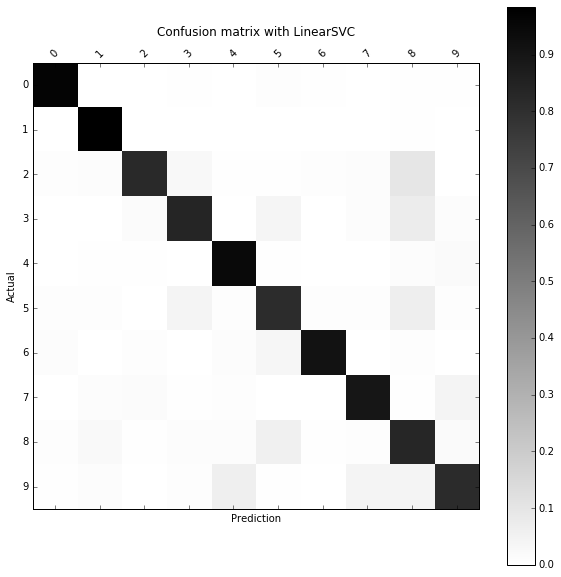

In [107]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix with LinearSVC', cmap='binary'):
    plt.figure(figsize=(10,10))
    plt.matshow(df_confusion, cmap=cmap, fignum=1)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel("Actual")
    plt.xlabel("Prediction")

plot_confusion_matrix(df_conf_norm)

In [111]:
# C-Support Vector Classification
start = time.time()
clf_SVC = SVC()
clf.fit(train_data,train_labels)
end = time.time()
print("Total time in seconds for C-support cector class", end-start)

Total time in seconds for C-support cector class 159.39911723136902


In [117]:
preds_SVC = clf.predict(test_data)
error_SVC = np.sum(preds_SVC != test_labels)
print("SVC made", error_SVC, "errors on", len(test_labels), "labels")

SVC made 1230 errors on 10000 labels


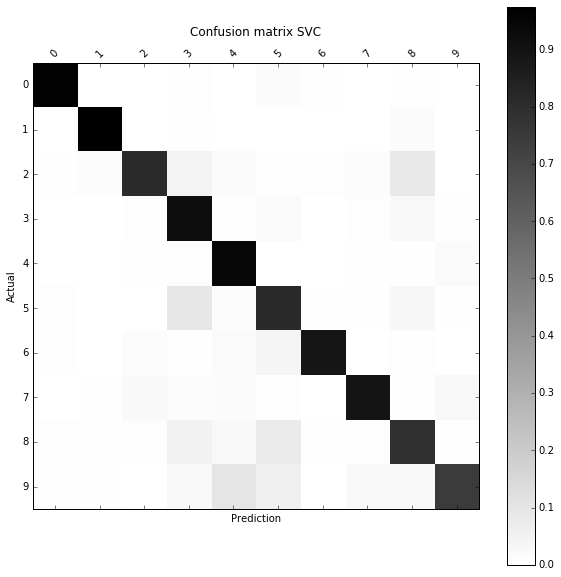

In [121]:
#Create confusion matrix
df_confusion = pd.crosstab(test_labels, np.transpose(preds_SVC))

#Create normalized confusion matrix
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
plot_confusion_matrix(df_conf_norm, title='Confusion matrix SVC')